In [1]:
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib
print(matplotlib.get_backend())
# matplotlib.use('TkAgg')

module://matplotlib_inline.backend_inline


In [2]:
data = load_iris()
X, y = data['data'], data['target']
data['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

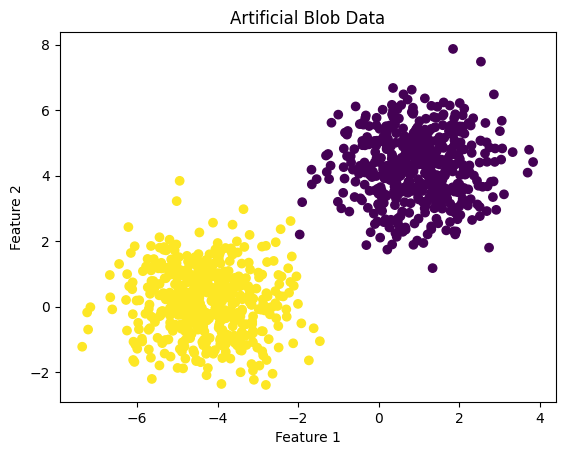

In [3]:
from sklearn.datasets import make_blobs

# Generate artificial blob data
X_blob, y_blob = make_blobs(n_samples=1000, centers=2, n_features=2, random_state=3)
plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap='viridis')
plt.title('Artificial Blob Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [4]:
def distance(p1 : np.ndarray,p2: np.ndarray) -> np.float64:
    return np.sqrt(np.sum((p1-p2)**2))

def neighbourhood(v1 : np.ndarray, v2 : np.ndarray) -> float:
    return np.power(2.0, -np.sum((np.abs(v1 - v2))))

def learningRateSchedule(epoch: int, maxEpochs: int) -> float:
    return 1.0 - (epoch / maxEpochs)

In [5]:
# Test the distance function with two sample points from X
p1 = np.array([1, 2])
p2 = np.array([1, 0])
print(f"Distance between {p1} and {p2}:", distance(p1, p2))

p1 = np.array([0, 0])
p2 = np.array([0, 0])
print(f"neighbourhood between {p1} and {p2}:", neighbourhood(p1, p2))


Distance between [1 2] and [1 0]: 2.0
neighbourhood between [0 0] and [0 0]: 1.0


In [13]:
def kohonen(X: np.ndarray, gridSize : int = 3, max_epoch : int = 1000, learningRate : float = 0.1, plot : bool = False):

    maxX = np.max(X[:, 0])
    minX = np.min(X[:, 0])
    maxY = np.max(X[:, 1])
    minY = np.min(X[:, 1])
    
    # Create initial grid within the data bounds
    xs = np.linspace(minX, maxX, gridSize)
    ys = np.linspace(minY, maxY, gridSize)
    grid = np.array([[np.array([x, y,], dtype=float) for y in ys] for x in xs])


    fig, ax = plt.subplots()
    for epoch in range(max_epoch):  # Number of epochs can be adjusted
          
        rand_idx = np.random.randint(0, X.shape[0])
        # Flatten the grid for distance calculation
        # Find BMU (Best Matching Unit) directly in the 2D grid
        min_dist = float('inf')
        bmu_coords = (0, 0)
        for i in range(gridSize):
            for j in range(gridSize):
                dist = distance(X[rand_idx], grid[i][j])
                if dist < min_dist:
                    min_dist = dist
                    bmu_coords = (i, j)
        bmu = grid[bmu_coords[0]][bmu_coords[1]]
          
        if(plot):
            ax.clear()
            ax.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
            # Convert grid to numpy array for easier indexing
            grid_np = np.array(grid).reshape(-1, 2)
            ax.scatter(grid_np[:, 0], grid_np[:, 1], c='red', marker='x', label='Grid Nodes')

            # Draw lines between adjacent grid nodes in the mesh
            grid_np_2d = np.array(grid)
            for i in range(gridSize):
                for j in range(gridSize):
                    if i + 1 < gridSize:
                        p1 = grid_np_2d[i][j]
                        p2 = grid_np_2d[i+1][j]
                        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='gray', linewidth=0.5, alpha=0.5)
                    if j + 1 < gridSize:
                        p1 = grid_np_2d[i][j]
                        p2 = grid_np_2d[i][j+1]
                        ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='gray', linewidth=0.5, alpha=0.5)

            # Highlight the current random data point and the BMU
            ax.scatter(X[rand_idx, 0], X[rand_idx, 1], c='green', s=100, marker='o', label='Current Data Point')
            ax.scatter(grid[bmu_coords[0]][bmu_coords[1]][0], grid[bmu_coords[0]][bmu_coords[1]][1], 
                c='orange', s=100, marker='s', label='BMU')

            ax.set_title(f'Grid Nodes at Epoch {epoch+1}')
            ax.set_xlabel('Feature 1')
            ax.set_ylabel('Feature 2')
            ax.legend()
            plt.pause(0.01)
            
            
        
        for i in range(gridSize):
            for j in range(gridSize):
                # Update the grid node based on the BMU and learning rate
                grid[i][j] += (X[rand_idx] - grid[i][j]) * learningRate * learningRateSchedule(epoch, max_epoch) * neighbourhood(np.array([bmu_coords[0], bmu_coords[1]]), np.array([i, j]))
        # for i, g in enumerate(grid):
        #     grid[i] += (X[rand_idx] - g)*learningRate*learningRateSchedule(epoch, max_epoch) * neighbourhood(grid[bmu], g)
            
        
    return grid

In [15]:
# kohonen(X, 2, 100, visualise=True)
# grid = kohonen(X, 3, 600, 1.0, plot=True)
matplotlib.use('TkAgg')

grid = kohonen(X_blob, 9, 100, 1.0, plot=True)

In [ ]:
def drawGrid(X, grid):
    gridSize = len(grid)
    fig, ax = plt.subplots()
    ax.clear()
    ax.scatter(X[:, 0], X[:, 1], c='blue', label='Data Points')
    # Convert grid to numpy array for easier indexing
    grid_np = np.array(grid).reshape(-1, 2)
    ax.scatter(grid_np[:, 0], grid_np[:, 1], c='red', marker='x', label='Grid Nodes')

    # Draw lines between adjacent grid nodes in the mesh
    grid_np_2d = np.array(grid)
    for i in range(gridSize):
        for j in range(gridSize):
            if i + 1 < gridSize:
                p1 = grid_np_2d[i][j]
                p2 = grid_np_2d[i+1][j]
                ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='gray', linewidth=0.5, alpha=0.5)
            if j + 1 < gridSize:
                p1 = grid_np_2d[i][j]
                p2 = grid_np_2d[i][j+1]
                ax.plot([p1[0], p2[0]], [p1[1], p2[1]], color='gray', linewidth=0.5, alpha=0.5)

    ax.set_title(f'Final Grid Nodes')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.legend()
    plt.show()


In [ ]:
drawGrid(X, grid)